In [1]:
import moonpies as mp
import default_config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

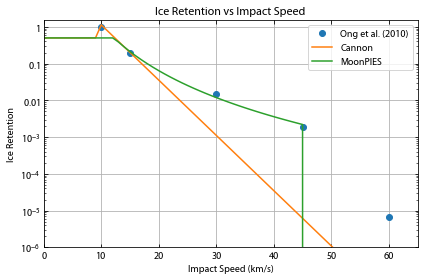

In [10]:
v = np.arange(70)*1000
ong_x = [10, 15, 30, 45, 60]
ong_y = [1, 1.97E-01, 1.47E-02, 1.93E-03, 6.60E-06]
retention_c = mp.ice_retention_factor(v, 'cannon')
retention_m = mp.ice_retention_factor(v, 'moonpies')
plt.plot(ong_x, ong_y, 'o', label='Ong et al. (2010)')
plt.semilogy(v/1000, retention_c, label='Cannon')
plt.semilogy(v/1000, retention_m, label='MoonPIES')
plt.title('Ice Retention vs Impact Speed')
plt.ylabel('Ice Retention')
plt.xlabel('Impact Speed (km/s)')
plt.ylim(1E-6, 1.5)
plt.xlim(0, 65)
plt.legend()
plt.savefig('/home/cjtu/projects/moonpies/figs/ice_retention.png')

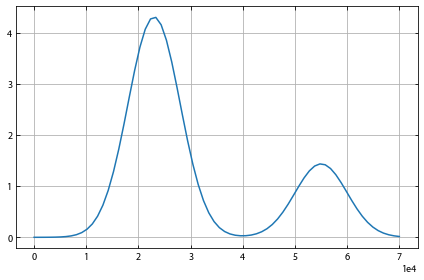

In [6]:
cfg = default_config.Cfg()
x = np.linspace(0, 70e3, 70)
halley_speeds = mp.gaussian(x, cfg.halley_mean_speed, cfg.halley_sd_speed) 
oort_speeds = mp.gaussian(x, cfg.oort_mean_speed, cfg.oort_sd_speed)
speeds = cfg.halley_to_oort_ratio * halley_speeds + oort_speeds
speed_prob = speeds/np.sum(speeds)
plt.plot(x, 18000*speeds)

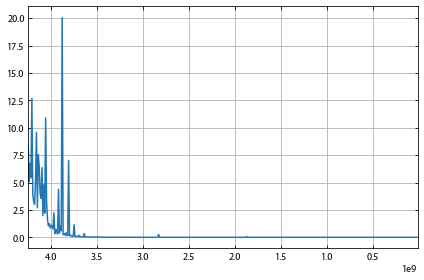

In [2]:
# moonpies
def_cfg = default_config.Cfg(mode='moonpies')
rng = mp.get_rng(def_cfg)
time_arr = mp.get_time_array(def_cfg)
ice = mp.get_impact_ice(time_arr, def_cfg, rng=rng)
plt.plot(time_arr, ice)
plt.xlim(time_arr.max(), time_arr.min())
plt.show()

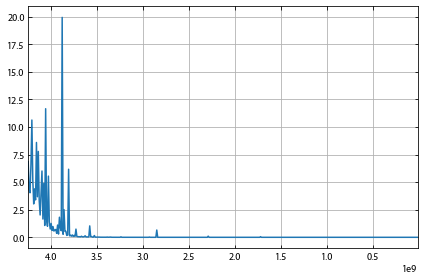

In [3]:
# cannon mode
can_cfg = default_config.Cfg(mode='cannon', impact_ice_basins=True)

rng = mp.get_rng(can_cfg)
time_arr = mp.get_time_array(can_cfg)
ice = mp.get_impact_ice(time_arr, can_cfg, rng=rng)
plt.plot(time_arr, ice)
plt.xlim(time_arr.max(), time_arr.min())
plt.show()

In [4]:
# Keep seed the same, test different parameters
out = []
densities = [950, 1300, 1500, 2000]
for mydensity in densities:
    print('Starting density', mydensity)
    cfg = default_config.Cfg(seed=20, write=False, ice_density=mydensity)
    print(cfg.ice_density)
    out.append(mp.main(cfg))

Starting density 950
950.0
Starting density 1300
1300.0
Starting density 1500
1500.0
Starting density 2000
2000.0


In [5]:
# Get outputs (ejecta dataframe, ice dataframe, strat dataframe dict)
# To get a strat dataframe, do cold trap in [""]:
ej, ice, strat_dict = out[0]
strat_dict['Haworth'].head(8)

,label,time,ice,ejecta,depth,icepct
0,Amundsen-Ganswindt,4.250000e+09,6.570244,225.899979,576.428833,2.8263
1,Ice,4.160000e+09,43.022240,0.000000,343.958588,100.0000
2,Shoemaker,4.150000e+09,5.636763,24.339754,300.936340,18.8039
3,Ice,4.130000e+09,6.193049,0.000000,270.959839,100.0000
4,Mendel-Rydberg,4.120000e+09,3.919610,31.403051,264.766785,11.0966
5,Ice,3.910000e+09,43.325039,0.000000,229.444107,100.0000
6,Amundsen,3.900000e+09,0.354867,10.181757,186.119064,3.3679
7,Ice,3.890000e+09,0.063701,0.000000,175.582443,100.0000


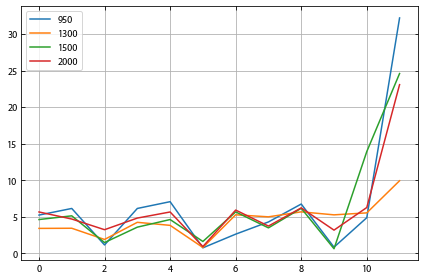

In [9]:
# stats on many strat column outputs
for i, dens in enumerate(densities):
    means = []
    ej, ice, strat_dict = out[i]

    # Get and plot mean of all strat columns in strat_dict
    for key in strat_dict:
        df = strat_dict[key]
        means.append(np.median(df.ice))
    plt.plot(means, label=dens)

plt.legend()

In [7]:
# Keep params the same, test different seeds
out = []
for myseed in [1, 45, 75647, 23452]:
    cfg = default_config.Cfg(seed=myseed, write=False)
    out.append(mp.main(cfg))

In [8]:
# cfg = default_config.Cfg(seed=12345, write=False, timestep=1e6)
# out = mp.main(cfg)